<center> Exploratory Data Analysis with Ensemble Modeling
<center> Problem Statement : For a given dataset which is the best classification algorithm(as per accuracy)
<center> Dataset : 'fake_job_postings.csv'

    

## Importing Libraries


In [ ]:
#Import required Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
#Reading csv file of dataset
df = pd.read_csv("/content/fake_job_postings.csv")
df.head()   #Display the first 5 examples in the dataset

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Exploring dataset

In [ ]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
##Info about the data shape of data, type of individual columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(17880, 18)

## Feature Selection

In [ ]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
df = df[['title', 'location','company_profile', 'requirements', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function','salary_range',
       'fraudulent']]

## Check for missing values and outliers

In [ ]:
# Check if there is any null value
df.isna().apply(pd.value_counts)

,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
False,17880.0,17534,14572,15185,17880.0,17880.0,17880.0,14409,10830,9775,12977,11425,2868,17880.0
True,NaN,346,3308,2695,NaN,NaN,NaN,3471,7050,8105,4903,6455,15012,NaN


In [ ]:
#Check for number of null values
df.isnull().sum()

title                      0
location                 346
company_profile         3308
requirements            2695
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
salary_range           15012
fraudulent                 0
dtype: int64

In [ ]:
#Check if any duplicate rows in dataset
df.duplicated().sum()

493

In [ ]:
#drop the duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
#Differentiate categorical data and numerical data
df_num = df[['telecommuting','has_company_logo','has_questions','fraudulent','salary_range']]
df_cat = df[['title', 'location','company_profile', 'requirements','employment_type',
       'required_experience', 'required_education', 'industry', 'function']]

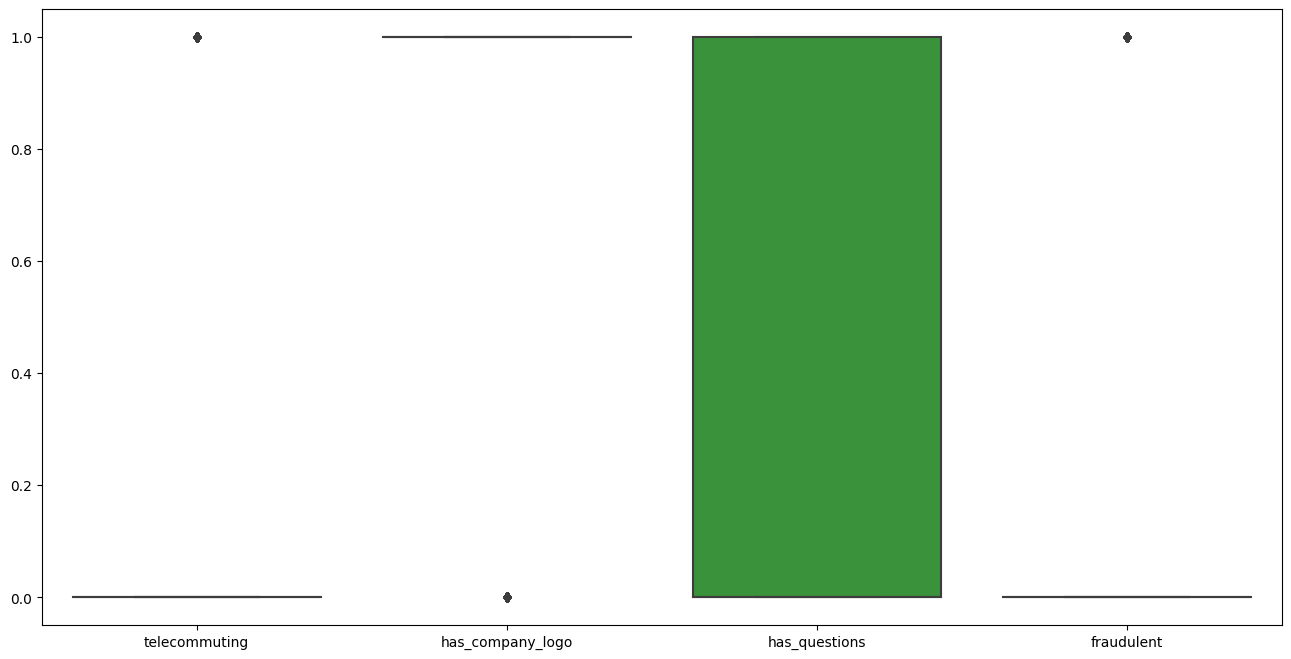

In [ ]:
# Checking for Outliers in numerical data
plt.figure(figsize=[16,8])
sb.boxplot(data = df_num)
plt.show()

- Columns 'telecommuting', 'has_company_logo' ,'fradulent' has minimal outliers.

## Removing Outliers

In [ ]:
#Removing Outliers from columns
df_num = df_num[df_num['telecommuting'] < 0.9 ]
df_num = df_num[df_num['fraudulent'] < 0.9 ]
df_num = df_num[df_num['has_company_logo'] > 0.1 ]
df_num

,telecommuting,has_company_logo,has_questions,fraudulent,salary_range
0,0,1,0,0,NaN
1,0,1,0,0,NaN
2,0,1,0,0,NaN
3,0,1,0,0,NaN
4,0,1,1,0,NaN
...,...,...,...,...,...
17872,0,1,0,0,NaN
17873,0,1,0,0,NaN
17875,0,1,1,0,NaN
17876,0,1,1,0,NaN


In [ ]:
df.isnull().sum()

title                      0
location                 340
company_profile         3255
requirements            2549
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3397
required_experience     6858
required_education      7889
industry                4769
function                6261
salary_range           14580
fraudulent                 0
dtype: int64

In [ ]:
df.dropna(axis= 0, how= 'any', inplace=True)

In [ ]:
df.isnull().sum()

title                  0
location               0
company_profile        0
requirements           0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
salary_range           0
fraudulent             0
dtype: int64

In [ ]:
df.shape

(1485, 14)

- Outliers and missing values has been removed.

## Creating Visual methods to analyze data

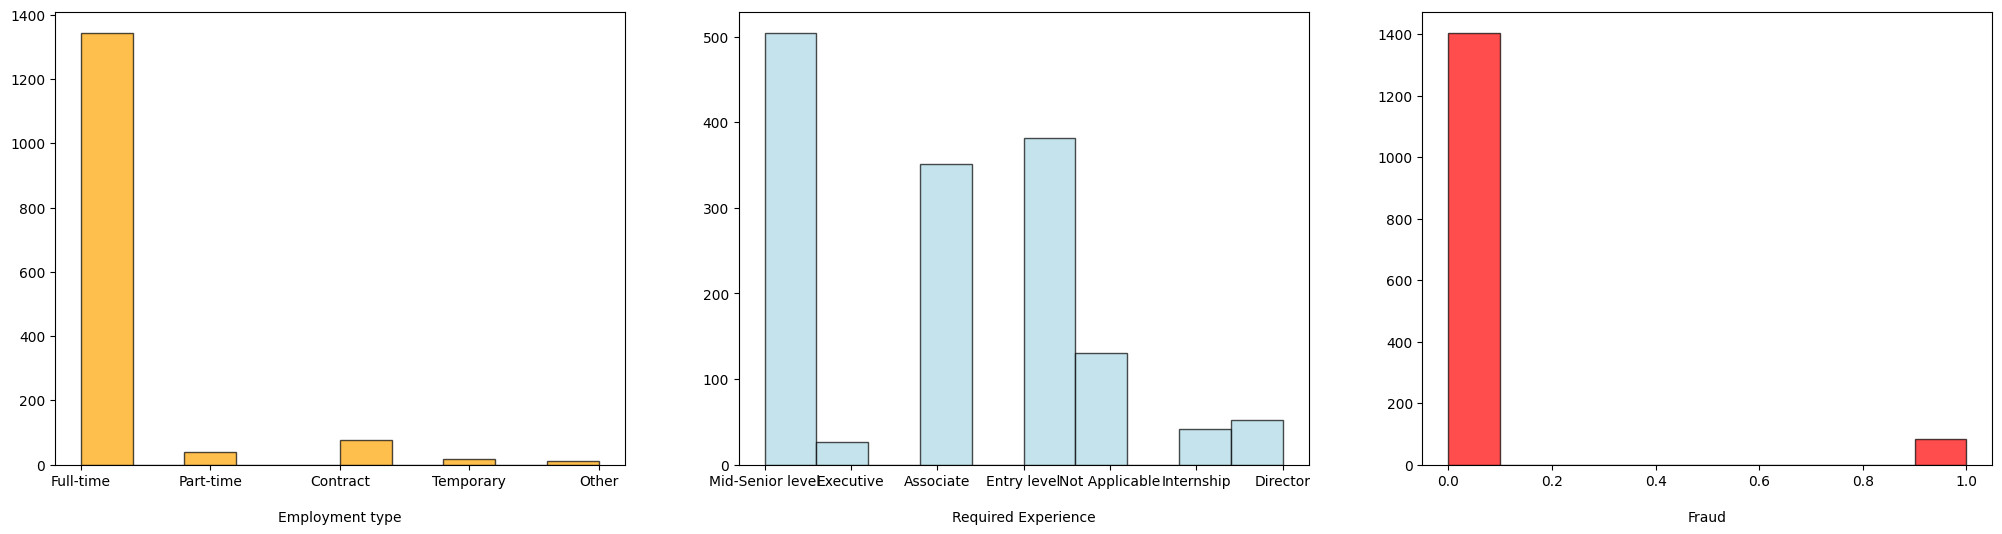

In [ ]:
# Plots to see the distribution of the continuous features individually

plt.figure(figsize= (25,20))
plt.subplot(3,3,1)
plt.hist(df.employment_type, color='orange', edgecolor = 'black', alpha = 0.7)
plt.xlabel('\nEmployment type')

plt.subplot(3,3,2)
plt.hist(df.required_experience, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('\nRequired Experience')

plt.subplot(3,3,3)
plt.hist(df.fraudulent, color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('\nFraud')


plt.show()

- Full-time jobs are posted more comparatively to other type of employment.
- There are more jobs available that requires Mid-senior level Experience.

<Axes: xlabel='function', ylabel='count'>

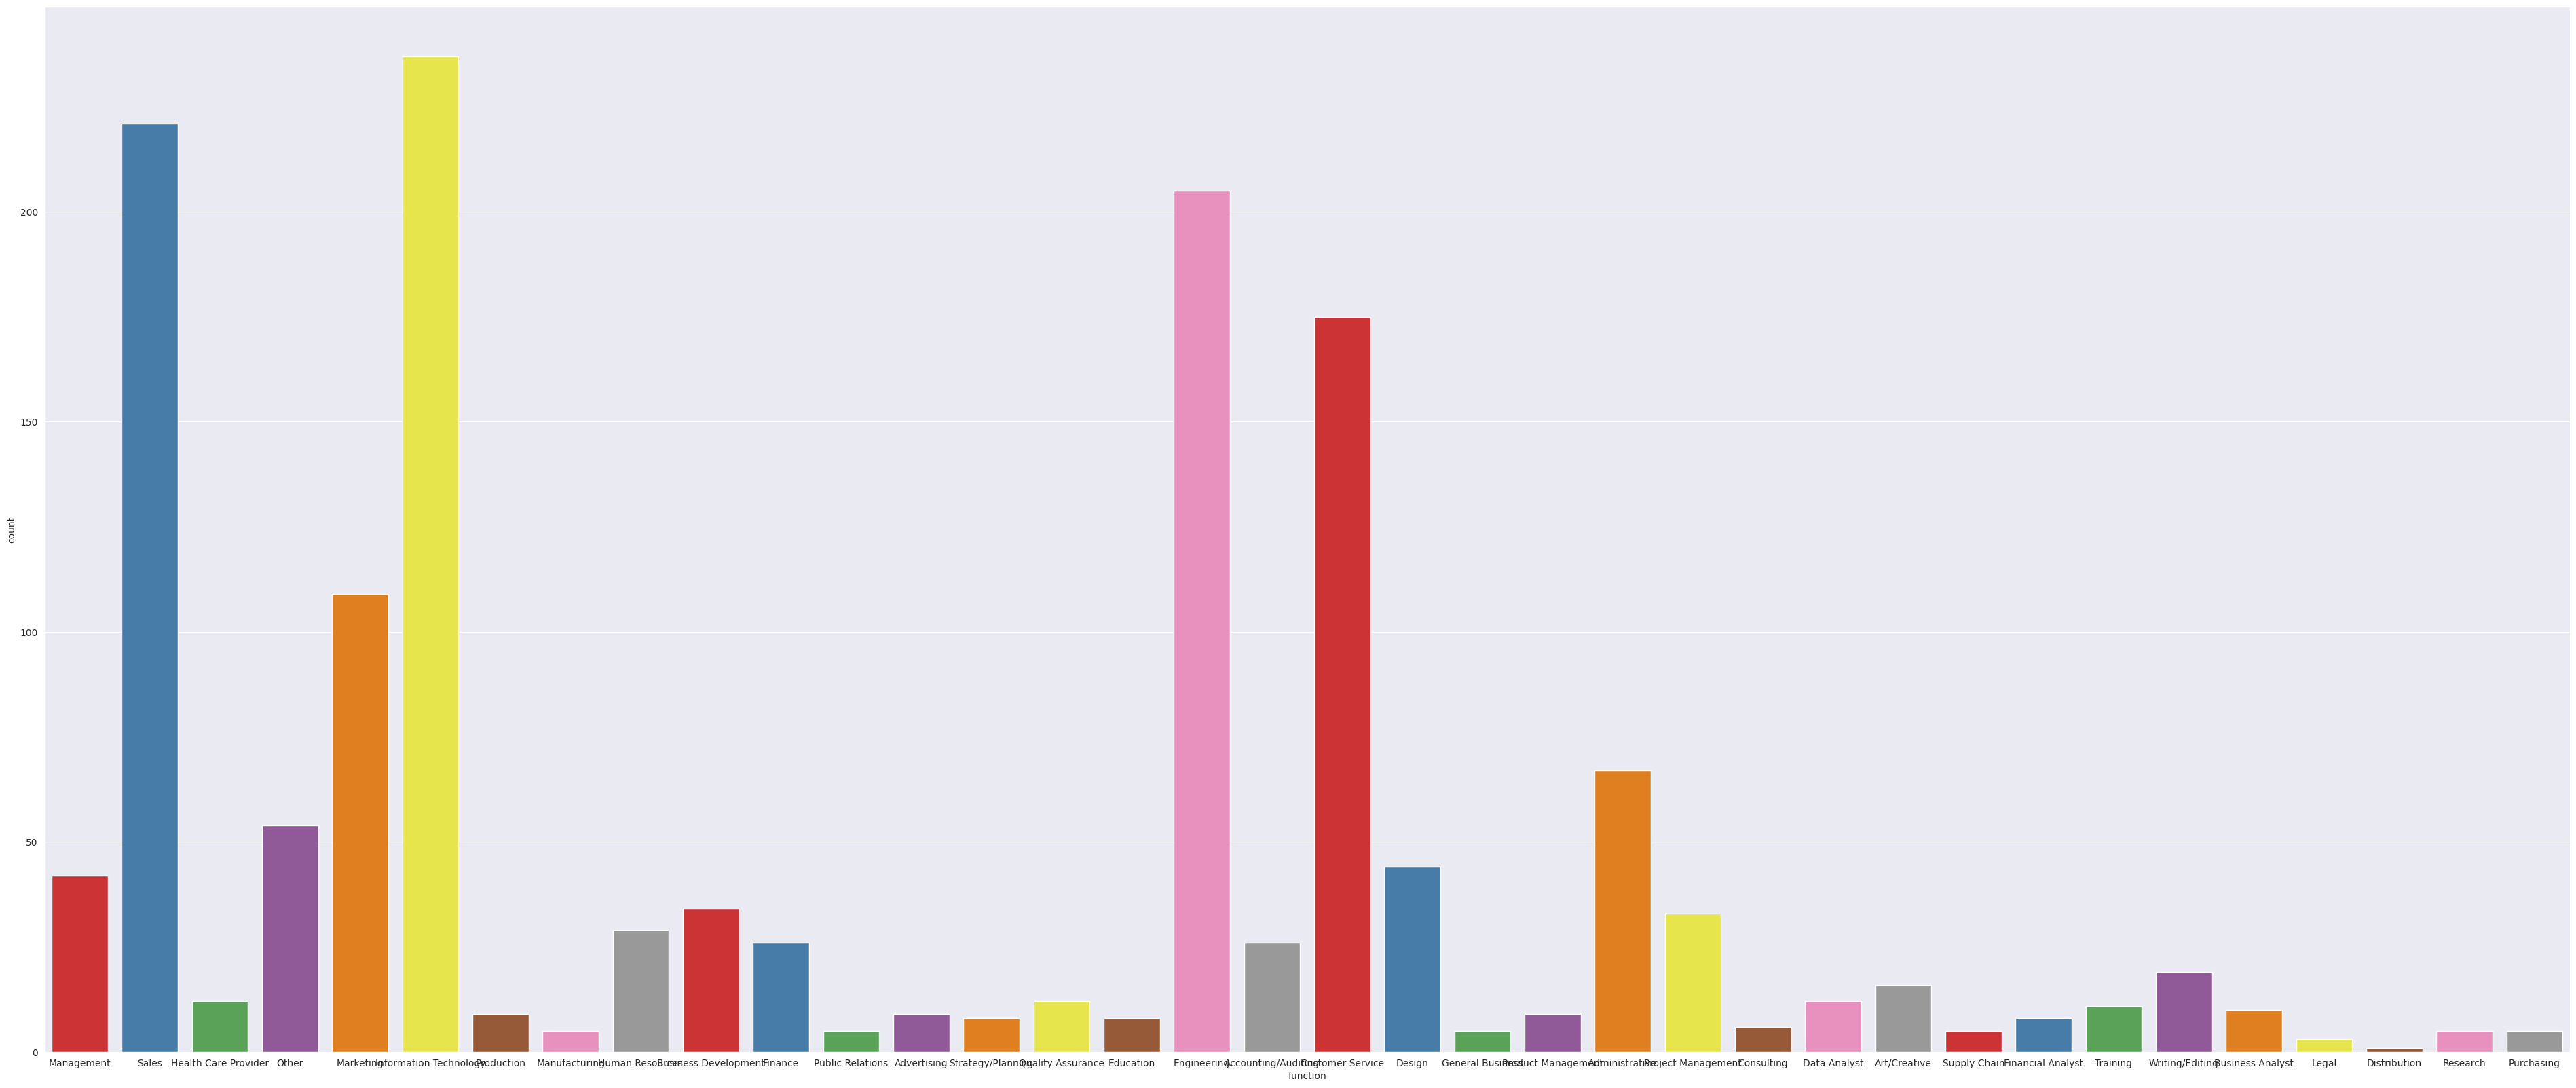

In [ ]:
plt.figure(figsize=(48,20))
sb.set_style("darkgrid")
sb.countplot(x='function',data=df,palette='Set1')

- There are maximum number of jobs are posted in IT field and minimum jobs are posted related to Distribution.
- Jobs in Sales,IT,Marketing,Engineering,Customer Service,Administrative are most in demand jobs.

In [ ]:
df.head(1)

,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
6,Head of Content (m/f),"DE, BE, Berlin","Founded in 2009, the Fonpit AG rose with its i...",Your Know-How: ...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,20000-28000,0


**************************

## Balancing dataset

- We have performed Explorartory Data Analysis on dataset,now we need to check if our dataset is balanced or not.
- Unbalanced dataset can lead to biased results for our model.

In [ ]:
df['fraudulent'].value_counts()

0    1403
1      82
Name: fraudulent, dtype: int64

- As we can see,we have very imbalanced dataset, need to balance it first and then train our model.

-
-> Separete fraudulent and non fraudulent dataframes:

In [ ]:
df['fraudulent'].values

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
fraud = df[df['fraudulent']== 1]
fraud.shape

(82, 14)

In [ ]:
fraud = df[df['fraudulent']== 1]
fraud.shape

(82, 14)

- we can oversample 'fraud' dataframe in order to get balanced dataset. 

In [ ]:
fraud = fraud.sample(1403, replace=True)

In [ ]:
fraud.shape, not_fraud.shape

NameError: ignored

###### Now our dataset is balanced:)

In [ ]:
# df = fraud.append(not_fraud)
# df.reset_index()

- We have so much categorical data, so we need to convert it to numerical data.
- To do so, we perform LabelEncoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['title'] = le.fit_transform(df['title'])
df['location'] = le.fit_transform(df['location'])
df['company_profile'] = le.fit_transform(df['company_profile'])
df['requirements'] = le.fit_transform(df['requirements'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['required_experience'] = le.fit_transform(df['required_experience'])
df['required_education'] = le.fit_transform(df['required_education'])
df['industry'] = le.fit_transform(df['industry'])
df['function'] = le.fit_transform(df['function'])
df['salary_range'] = le.fit_transform(df['salary_range'])

In [ ]:
df = df.reset_index()
df.head()

,index,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
0,6,474,24,152,1239,0,1,1,1,5,5,64,20,175,0
1,15,1151,203,197,588,0,1,1,1,3,1,30,31,66,0
2,23,1155,236,368,575,0,1,0,1,3,9,47,31,33,0
3,76,690,405,312,687,0,1,1,1,0,4,39,16,430,0
4,98,497,222,440,786,0,1,1,1,5,4,63,23,501,1


### Split dataset into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
len(df['title'].unique())

1194

In [ ]:
X = df[['title', 'location', 'company_profile', 'requirements',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'salary_range']].values
Y = df[['fraudulent']].values
X


array([[ 474,   24,  152, ...,   64,   20,  175],
       [1151,  203,  197, ...,   30,   31,   66],
       [1155,  236,  368, ...,   47,   31,   33],
       ...,
       [ 238,  379,  161, ...,   75,    7,  270],
       [ 185,  252,   62, ...,   16,    9,  468],
       [ 776,   85,  402, ...,   75,   31,  141]])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1113, 13), (372, 13), (1113, 1), (372, 1))

********************************************************************************************************************************

- Now we will apply 3 different classification algorithms to gain maximum possible accuracy score which are:
 - 1) Logistic Regression
 - 2) K Nearest Neighbours
 - 3) Random Forest
 
- For training these models,
    - Independent variable : X
    - Dependent variable : Y (Check if posted job is fake or not)


### 1) Logistic Regression

#### Train the model:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LgR = LogisticRegression()

In [ ]:
LgR.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Test the Model:

In [ ]:
Y_pred = LgR.predict(X_test)

In [ ]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [ ]:
Y_test.shape, Y_pred.shape

((372,), (372,))

In [ ]:
df_lgr = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_lgr

,Y_test,Y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
367,0,0
368,0,0
369,0,0
370,0,0


#### Check Accuracy Score :

In [ ]:
from sklearn.metrics import accuracy_score,precision_score

In [ ]:
accuracy_score(Y_pred, Y_test)

0.9327956989247311

### Accuracy using Logostic Regression Algorithm : 94%

************************************

### 2) K Nearest Neighbors

#### Train the Model:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

#### Test the Model:

In [ ]:
Y_pred = knn.predict(X_test)

In [ ]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [ ]:
df_knn = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_knn

,Y_test,Y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
367,0,0
368,0,0
369,0,0
370,0,0


#### Check Accuracy Score :

In [ ]:
accuracy_score(Y_pred,Y_test)

0.9301075268817204

### Accuracy using K Nearest Neighbors Algorithm : 95%

******************************************

### 3) Random Forest Algorithm

#### Train the Model:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=5)

In [ ]:
rfc.fit(X_train, Y_train)

<ipython-input-58-96e8a0ce9cd3>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=5)

#### Test the Model:

In [ ]:
Y_pred = rfc.predict(X_test)

In [ ]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [ ]:
df_rfc = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_rfc

,Y_test,Y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
367,0,0
368,0,0
369,0,0
370,0,0


#### Check Accuracy Score:

In [ ]:
accuracy_score(Y_pred,Y_test)*100


97.04301075268818

### Accuracy using Random Forest Classification Algorithm : 97.5%

##### --> As per accuracy scores, Random forest algorithm has highest accuracy score, that's why for given dataset 'Random Forest' algorithm is best suitable to use.